In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# single exponential smoothing
from statsmodels.tsa.seasonal import seasonal_decompose
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

1、加载数据

In [2]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
airline.shape

(144, 1)

In [3]:
airline.head()

,Total
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:title={'center':'passengers data'}, xlabel='Month'>

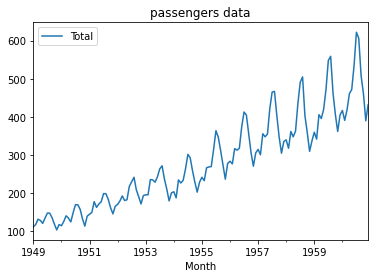

In [4]:
airline[['Total']].plot(title='passengers data')

2、分解序列

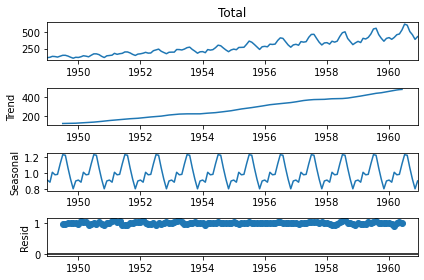

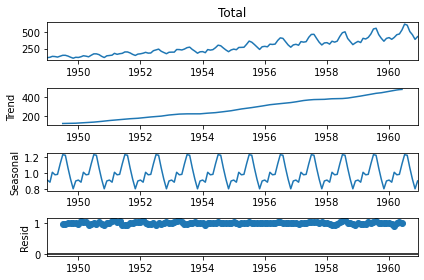

In [5]:
decompose_result = seasonal_decompose(airline['Total'], model='multiplicative')
decompose_result.plot()


In [6]:
airline['Total']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Total, Length: 144, dtype: int64

In [7]:
airline2 = pd.read_csv('airline_passengers2.csv', index_col='Month', parse_dates=True)


In [8]:
airline2

,Total
Month,
2021-01-01,112
2021-01-02,118
2021-01-03,132
2021-01-04,129
2021-01-05,121
...,...
2021-05-20,606
2021-05-21,508
2021-05-22,461


In [9]:
decompose_result2 = seasonal_decompose(airline2['Total'], model='multiplicative')

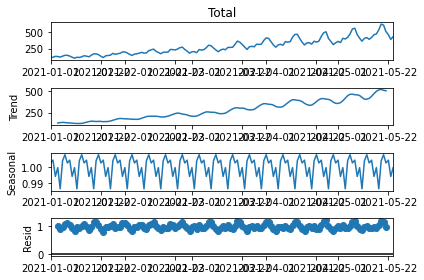

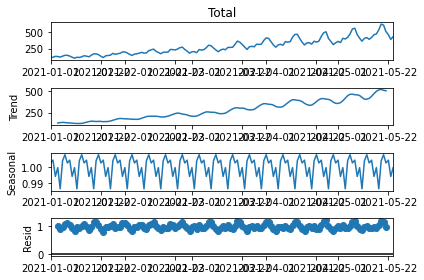

In [10]:
decompose_result2.plot()

In [11]:
airline2.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
airline2.index.freq = 'D'

In [13]:
airline2.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24'],
              dtype='datetime64[ns]', name='Month', length=144, freq='D')

In [14]:
m = 12
alpha = 1 / 2 / m

In [15]:
SimpleExpSmoothing(airline2['Total']).fit

/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<bound method SimpleExpSmoothing.fit of <statsmodels.tsa.holtwinters.model.SimpleExpSmoothing object at 0x7ffa1c305d60>>

In [16]:
SimpleExpSmoothing?

<AxesSubplot:title={'center':'single exponential smoothing'}, xlabel='Month'>

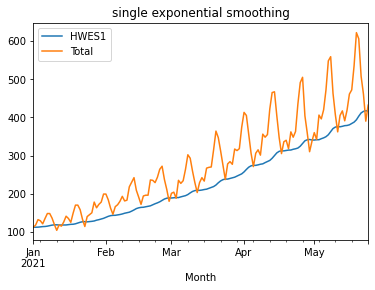

In [17]:
airline2['HWES1'] = SimpleExpSmoothing(airline2['Total']).fit(smoothing_level=1/24, optimized=False,use_brute=True).fittedvalues
airline2[['HWES1', 'Total']].plot(title='single exponential smoothing')

/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'add'}, xlabel='Month'>

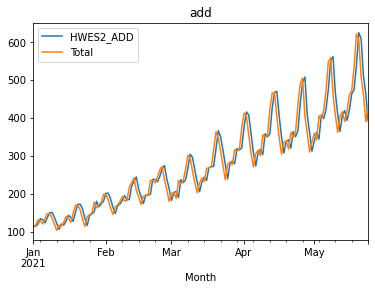

In [18]:
airline2['HWES2_ADD'] = ExponentialSmoothing(airline2['Total'], trend='add').fit().fittedvalues
airline2[['HWES2_ADD', 'Total']].plot(title='add')

/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'mul'}, xlabel='Month'>

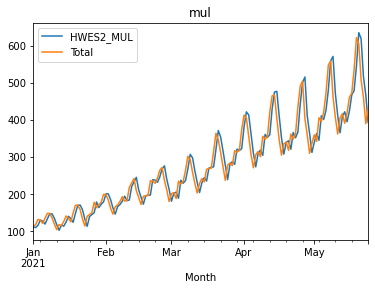

In [19]:
airline2['HWES2_MUL'] = ExponentialSmoothing(airline2['Total'], trend='mul').fit().fittedvalues
airline2[['HWES2_MUL', 'Total']].plot(title='mul')

<AxesSubplot:title={'center':'mul & add'}, xlabel='Month'>

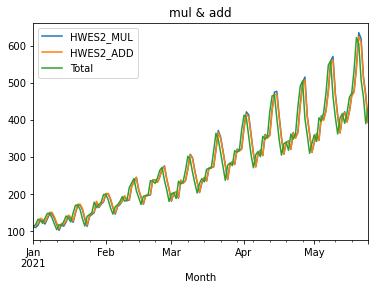

In [20]:
airline2[['HWES2_MUL','HWES2_ADD','Total']].plot(title='mul & add')

In [36]:
type(fitted_model.forecast(24))

pandas.core.series.Series

/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Triple Exponential Smoothing add & mul'}, xlabel='Month'>

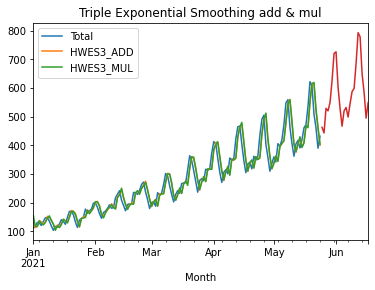

In [34]:
airline2['HWES3_ADD'] = ExponentialSmoothing(airline2['Total'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
airline2['HWES3_MUL'] = ExponentialSmoothing(airline2['Total'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues

airline2[['Total', 'HWES3_ADD', 'HWES3_MUL']].plot(title='Triple Exponential Smoothing add & mul')
seasonal_periods=12
fitted_model=ExponentialSmoothing(airline2['Total'],trend='mul',seasonal='mul',seasonal_periods=seasonal_periods).fit()
fitted_model.forecast(24).plot()

In [22]:
fitted_model=ExponentialSmoothing(airline2['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(100)

/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/chenxilin/Install/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:>

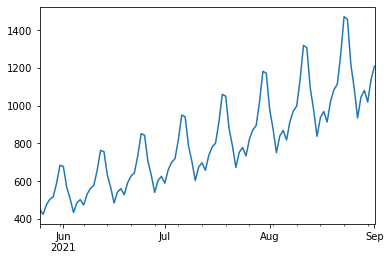

In [23]:

test_predictions.plot()

In [24]:
fitted_model.forecast(10)

2021-05-25    450.676583
2021-05-26    424.820034
2021-05-27    475.497054
2021-05-28    504.078221
2021-05-29    517.874564
2021-05-30    590.149052
2021-05-31    684.231322
2021-06-01    678.035582
2021-06-02    567.115901
2021-06-03    507.827669
Freq: D, dtype: float64

In [25]:
fitted_model.predict?